![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+ML%2FSolution+Prototypes%2Fdocument-processing&file=5-document-anomalies.ipynb)
<!--- header table --->
<table align="left">
<tr>
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520ML%2FSolution%2520Prototypes%2Fdocument-processing%2F5-document-anomalies.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb">
      <img width="32px" src="https://www.gstatic.com/images/branding/gcpiconscolors/bigquery/v1/32px.svg" alt="BigQuery logo">
      <br>Open in<br>BigQuery Studio
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb">
      <img width="32px" src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</tr>
<tr>
  <td colspan="5" style="text-align: right">
    <b>Share This On: </b> 
    <a href="https://www.linkedin.com/sharing/share-offsite/?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="Linkedin Logo" width="20px"></a> 
    <a href="https://reddit.com/submit?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb"><img src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit Logo" width="20px"></a> 
    <a href="https://bsky.app/intent/compose?text=https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="BlueSky Logo" width="20px"></a> 
    <a href="https://twitter.com/intent/tweet?url=https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20ML/Solution%20Prototypes/document-processing/5-document-anomalies.ipynb"><img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X (Twitter) Logo" width="20px"></a> 
  </td>
</tr>
<tr>
  <td colspan="5" style="text-align: right">
    <b>Connect With Author On: </b> 
    <a href="https://www.linkedin.com/in/statmike"><img src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="Linkedin Logo" width="20px"></a>
    <a href="https://www.github.com/statmike"><img src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub Logo" width="20px"></a> 
    <a href="https://www.youtube.com/@statmike-channel"><img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/YouTube_full-color_icon_%282024%29.svg" alt="YouTube Logo" width="20px"></a>
    <a href="https://bsky.app/profile/statmike.bsky.social"><img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="BlueSky Logo" width="20px"></a> 
    <a href="https://x.com/statmike"><img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X (Twitter) Logo" width="20px"></a>
  </td>
</tr>
</table>

# Detecting Anomalous Documents

> This workflow is part of a series of workflows for the solution prototype: [Document Processing With Generative AI: Parse, Extract, Validate Authenticity, and More](./readme.md)

In the previous workflow ([4-document-similarity](./4-document-similarity.ipynb)) we used distance between embeddings as a way of understanding document simlarity.  In this workflow we expand that idea to also detect dis-similar documents or anomalies which are potentially fraudulent.  This workflow uses the same `VECTOR_SEARCH` function directly within BigQuery and the set of documents with known variations that was also prepared in a BigQuery table in workflow 2 ([2-document-extraction](./2-document-extraction.ipynb)), and embedding values added in workflow 3 ([3-document-embedding](./3-document-embedding.ipynb)).

## Setup

Note that this notebook expects to use a local virtual environment with the `./requirements.txt` installed.  

A potential workaround if using this notebook standalone is running:

>```python
>pip install -r requirements.txt
>```

And then restart the kernel.

In [1]:
# package imports for this work
import os, subprocess

from IPython.display import display, Image, Markdown
import ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import storage
from google.cloud import bigquery

In [2]:
# what project are we working in?
PROJECT_ID = subprocess.run(['gcloud', 'config', 'get-value', 'project'], capture_output=True, text=True, check=True).stdout.strip()
PROJECT_ID

'statmike-mlops-349915'

In [3]:
LOCATION = 'us-central1'

SERIES = 'applied-ml-solution-prototypes'
EXPERIMENT = 'document-processing'
GCS_BUCKET = PROJECT_ID # bucket has same name as project here

In [4]:
# setup google cloud storage client
gcs = storage.Client(project = PROJECT_ID)
bucket = gcs.bucket(GCS_BUCKET)

# setup google cloud bigquery client
bq = bigquery.Client(project = PROJECT_ID)

# load the bigquery magics for jupyter with:
%load_ext bigquery_magics

---
## Review Data Sources

During this series we have created information tables in BigQuery to collect document information (extrated field, embedded values of pages) and vendor average information.  These tables will becomes the basis for evaluating documents as they come in.


### Vendor Averages

This table has the average embedding for documents with known authenticity as well is the distribution information for authentic documents distance from the average embedding.  This information is aggregated for each known vendor.

In [5]:
%%bigquery
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity_vendor_info`

Query is running:   0%|          |

Downloading:   0%|          |

,vendor,average_embedding,average_distance_center,stddev_distance_center
0,vendor_4,"[-0.003796251816585715, 0.04530451753571429, 0...",-0.964754,0.010032
1,vendor_7,"[0.013940833694827586, 0.042548744, 0.04536325...",-0.957068,0.006144
2,vendor_9,"[-0.0017655710555652179, 0.03942124971304347, ...",-0.961740,0.010771
3,vendor_11,"[-0.006832965441904762, 0.04243769000000001, 0...",-0.939972,0.013300
4,vendor_3,"[-0.0036581132154210523, 0.028580572899999997,...",-0.971520,0.004743
5,vendor_0,"[-0.014520798997894737, 0.03216948262631579, 0...",-0.958915,0.005220
6,vendor_2,"[0.009100865230625, 0.051977301012500005, 0.06...",-0.951682,0.008794
7,vendor_5,"[-4.8841104625000384e-05, 0.03990647653124999,...",-0.964690,0.004031
8,vendor_6,"[0.01954306822105263, 0.027207733263157893, 0....",-0.952401,0.006769
9,vendor_1,"[-0.027806649450000002, 0.04521821479999999, 0...",-0.937559,0.011703


### Documents With Known Authenticity

We have a collection of derived information for document known to be authentic:

In [6]:
%%bigquery
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,ml_process_document_result,ml_process_document_status,vendor_name,vendor_address,company_name,company_address,invoice_id,invoice_total,line_item,uri,updated,vendor,embedding
0,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,BioTech Innovations Corp,"666 Genome Way\nSan Diego, CA 92121",KD-2024-0315,$37108.50,"[{'item_sku': 'WEB- DEV- 001', 'item_descripti...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:53:37.673000+00:00,vendor_2,"[0.0089465566, 0.0536203124, 0.0614382476, -0...."
1,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,HealthAI Innovations,"123 Main Street\nSan Francisco, CA 94111",INV-2024-0315,$21924.00,"[{'item_sku': 'CSD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:53:35.765000+00:00,vendor_2,"[0.0121024447, 0.0618715286, 0.0657297298, -0...."
2,"{""entities"":[{""confidence"":1,""id"":""1"",""propert...",,None,None,GlobalMed Health,"123 Serene Drive\nSan Diego, CA 92101",INV-2024-1122,$23600.00,"[{'item_sku': 'WEB- DEV- 001', 'item_descripti...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:53:35.038000+00:00,vendor_2,"[0.0141071267, 0.0521478951, 0.0623387806, -0...."
3,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,Swift Logistics Solutions,"987 Elm Street\nDallas, TX 75201",KD-2024-0722,$19920.00,"[{'item_sku': 'WEB- DEV- 001', 'item_descripti...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:53:39.182000+00:00,vendor_2,"[0.0090936739, 0.0496088825, 0.0622638054, -0...."
4,"{""entities"":[{""confidence"":1,""id"":""1"",""propert...",,None,None,Style Forward Retail,"99 Fashion Blvd Los Angeles, CA 90015",INV-2024-1105,$34800.00,"[{'item_sku': None, 'item_description': 'Web D...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:52.221000+00:00,vendor_12,"[0.0019979002, 0.0560282543, 0.0625561327, -0...."


### Documents With Unknown Authenticity

We have a collection of derived information for documents with unknown authenticity - actually in workflow [0-generate-documents](./0-generate-documents.ipynb) these documents were created by a process that does allow deviations in the layout and format.  These document should be detected as anomalous!

In [7]:
%%bigquery
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,ml_process_document_result,ml_process_document_status,vendor_name,vendor_address,company_name,company_address,invoice_id,invoice_total,line_item,uri,updated,vendor,embedding
0,"{""mimeType"":""application/pdf""}",,None,None,None,None,None,None,[],gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:54:11.423000+00:00,vendor_5,"[0.0131794149, 0.0133737465, 0.00720742205, -0..."
1,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,Cyberdyne Systems,"789 Pine Lane\nHill Valley, WA 98052",INV-2024-1022,$50032.00,"[{'item_sku': 'CS- WEB- 001', 'item_descriptio...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:54:13.291000+00:00,vendor_5,"[0.00087831, 0.0551444367, 0.0510212779, -0.00..."
2,"{""mimeType"":""application/pdf""}",,None,None,None,None,None,None,[],gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:55:09.934000+00:00,vendor_8,"[0.0160381682, 0.0116377119, 0.00194062886, 0...."
3,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,Apex Digital Solutions,None,ManuTech Solutions,"321 Oak Street\nDetroit, MI 48201",INV-2024-1022,$19040.00,"[{'item_sku': 'SW- DEV- 001', 'item_descriptio...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:11.750000+00:00,vendor_10,"[-0.0163299236, 0.0281633101, 0.0402984172, -0..."
4,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,Apex Digital Solutions,None,Quantum Health Systems,"890 BioTech Drive\nBoston, MA 02115",INV-2024-1023,$23940.00,"[{'item_sku': 'SWDEV- 001', 'item_description'...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:12.517000+00:00,vendor_10,"[-0.0247134808, 0.0297346395, 0.0328056589, -0..."


---
## Compare A Document To Vendor Information

These queries use a single document as the basis for evaluations:

>'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_5/fake_invoices/vendor_5_invoice_2.pdf'

Change this to any of the vendors documents in the subfolder `/fake_invoices`.

### Calculate The Distance From the Document To The Vendor Average

In [29]:
%%bigquery
# for query document(s) calcualte the distance to each vendors average embedding
SELECT
    SPLIT(query.uri, '/')[7] as query, 
    base.vendor,
    distance
FROM VECTOR_SEARCH(
    # The base table and column to search for neighbors in:
    (SELECT vendor, average_embedding FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity_vendor_info`),
    'average_embedding',
    # The query table and column to search with - pick an anomalous doucment
    (
        SELECT uri, embedding, vendor
        FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
        WHERE uri LIKE '%vendor_5_invoice_2.pdf%'
    ),
    'embedding',
    # options
    top_k => -1,
    distance_type => 'DOT_PRODUCT'
)
WHERE query.vendor = base.vendor


Query is running:   0%|          |

Downloading:   0%|          |

,query,vendor,distance
0,vendor_5_invoice_2.pdf,vendor_5,-0.948312


**Interpretation**

This document is not super close to the vendors average.  Perhaps it is mislabeled as the wrong vendor.  In the next section we look at the documents distance to each vendors average.

### Calculate The Distance From The Document To Each Vendor Average



In [30]:
%%bigquery
# for query document(s) calcualte the distance to each vendors average embedding
SELECT
    SPLIT(query.uri, '/')[7] as query, 
    base.vendor,
    distance
FROM VECTOR_SEARCH(
    # The base table and column to search for neighbors in:
    (SELECT vendor, average_embedding FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity_vendor_info`),
    'average_embedding',
    # The query table and column to search with - pick an anomalous doucment
    (
        SELECT uri, embedding, vendor
        FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
        WHERE uri LIKE '%vendor_5_invoice_2.pdf%'
    ),
    'embedding',
    # options
    top_k => -1,
    distance_type => 'DOT_PRODUCT'
)
ORDER BY distance

Query is running:   0%|          |

Downloading:   0%|          |

,query,vendor,distance
0,vendor_5_invoice_2.pdf,vendor_5,-0.948312
1,vendor_5_invoice_2.pdf,vendor_14,-0.921134
2,vendor_5_invoice_2.pdf,vendor_12,-0.890376
3,vendor_5_invoice_2.pdf,vendor_9,-0.889024
4,vendor_5_invoice_2.pdf,vendor_13,-0.887633
5,vendor_5_invoice_2.pdf,vendor_8,-0.885243
6,vendor_5_invoice_2.pdf,vendor_11,-0.883796
7,vendor_5_invoice_2.pdf,vendor_4,-0.881920
8,vendor_5_invoice_2.pdf,vendor_10,-0.873312
9,vendor_5_invoice_2.pdf,vendor_7,-0.866050


**Interpretation**

The document is actaully closest to the correct vendor.  Rather than being mis-labled it is likely a document that need to be reviewed for authenticity.  This will be done with generative AI in the next workflow [6-document-comparison](./6-document-comparison.ipynb)

### Evaluate The Distance Between The Document And Vendor(s)

Just looking at the distance calculations above makes it clear this choosen document is anomalous.  Sometime documents will be a closer to the cutoff and harder to evaluate.  This next step uses the distribution information to statistically evaluate the distance and flag it for consideration as anomalous.

One method for doing this is a Z-score ([standard score](https://en.wikipedia.org/wiki/Standard_score)) which measures how many standard deviations a particular distance is from the mean of the distribution.  A Z-score of of 2 would indicate the about 2.3% of observations are expected to be more extreme.  A value of 3 would mean 0.1% - very rare/extreme.

In [31]:
%%bigquery
# for query document(s) calcualte the distance to each vendors average embedding
SELECT
    SPLIT(query.uri, '/')[7] as query, 
    base.vendor,
    distance,
    ABS((distance - base.average_distance_center) / base.stddev_distance_center) AS Z_score
FROM VECTOR_SEARCH(
    # The base table and column to search for neighbors in:
    (
        SELECT vendor, average_embedding, average_distance_center, stddev_distance_center
        FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity_vendor_info`
    ),
    'average_embedding',
    # The query table and column to search with - pick an anomalous doucment
    (
        SELECT uri, embedding, vendor
        FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
        WHERE uri LIKE '%vendor_5_invoice_2.pdf%'
    ),
    'embedding',
    # options
    top_k => -1,
    distance_type => 'DOT_PRODUCT'
)
ORDER BY distance

Query is running:   0%|          |

Downloading:   0%|          |

,query,vendor,distance,Z_score
0,vendor_5_invoice_2.pdf,vendor_5,-0.948312,4.063574
1,vendor_5_invoice_2.pdf,vendor_14,-0.921134,7.666776
2,vendor_5_invoice_2.pdf,vendor_12,-0.890376,11.097916
3,vendor_5_invoice_2.pdf,vendor_9,-0.889024,6.751138
4,vendor_5_invoice_2.pdf,vendor_13,-0.887633,21.151963
5,vendor_5_invoice_2.pdf,vendor_8,-0.885243,7.282444
6,vendor_5_invoice_2.pdf,vendor_11,-0.883796,4.223610
7,vendor_5_invoice_2.pdf,vendor_4,-0.881920,8.256592
8,vendor_5_invoice_2.pdf,vendor_10,-0.873312,11.616947
9,vendor_5_invoice_2.pdf,vendor_7,-0.866050,14.813898


**Interpretation**

All of these Z-scores indicate that no matter which vendor the document is compared to it is considered to be very extreme - anomalous.  

> Using a cutoff of 3 would flag the 0.1% most extreme examples as anomalous.

## Use A Model Trained To Re-Dimensionalize Document Embeddings

In the previous workflow ([4-document-similarity](./4-document-similarity.ipynb)) we used BigQuery to train a PCA model that learned a 2-dimension version of the embeddings from known authentic documents.  This model can also be used with the built-in function [ML.DETECT_ANOMALIES](https://cloud.google.com/bigquery/docs/reference/standard-sql/bigqueryml-syntax-detect-anomalies#pca_model) to evaluate new documents embeddings.

In [35]:
%%bigquery
SELECT *
FROM ML.DETECT_ANOMALIES(
    MODEL `statmike-mlops-349915.solution_prototype_document_processing.pca_known_authentic`,
    STRUCT(0.0 AS contamination),
    (
        SELECT vendor, embedding
        FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
        WHERE uri LIKE '%vendor_5_invoice_2.pdf%'
    )
)
#WHERE is_anomaly = True

Query is running:   0%|          |

Downloading:   0%|          |

,is_anomaly,mean_squared_error,vendor,embedding
0,False,704.49798,vendor_5,"[-0.00559855951, 0.0383597128, 0.0557797365, 0..."


## Visually Compare Documents

Compare the current document to a known authentic document.

In [36]:
query_doc = 'vendor_5_invoice_2.png'
query_vendor = 'vendor_5'

In [37]:
def compare_documents(query_doc, query_vendor):
    bucket = gcs.bucket(GCS_BUCKET)
    blob_prefix = f"{SERIES}/{EXPERIMENT}/"
    query_blob = bucket.blob(blob_prefix + f"{query_vendor}/fake_invoices/{query_doc}")
    next_blob = bucket.blob(blob_prefix + f"{query_vendor}/invoices/{query_vendor}_invoice_0.png")

    query_image_bytes = ipywidgets.Image(value= query_blob.download_as_bytes(), format = 'png', width = 400)
    next_image_bytes = ipywidgets.Image(value= next_blob.download_as_bytes(), format = 'png', width = 400)
    
    return display(
        ipywidgets.HBox(
            [
                ipywidgets.VBox([ipywidgets.HTML(value = f"<div style='text-align: center; margin-bottom: 5px;'><b>Query Document</b></div>"), query_image_bytes], layout = {'align_items': 'center'}),
                ipywidgets.VBox([ipywidgets.HTML(value = f"<div style='text-align: center; margin-bottom: 5px;'><b>Vendor Example: Known Authentic</b></div>"), next_image_bytes], layout = {'align_items': 'center'}),
            ],
            layout = {'justify_content': 'space-around'}
        )
    )

compare_documents(query_doc, query_vendor)

**Interpretation**

Ignoring the actual values and text we stills ee formatting differences that indicate a potential change in format or fraudulent document here.  Notice the font type and size of the company name and the logo representation.  Also notice the use of bold text changes for the invoice totals and the thank you note at the bottom changes justification.

### Plot The Document With the Vendor Average Embeddings

Use the PCA model to predict the 2-d representation of vendor average embedding as the document. Plot these for evaluation.

In [38]:
%%bigquery pca_predictions_vendors
SELECT vendor, ml_generate_embedding_result as pca_embedding
FROM ML.GENERATE_EMBEDDING(
    MODEL `statmike-mlops-349915.solution_prototype_document_processing.pca_known_authentic`,
    (SELECT vendor, average_embedding as embedding FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity_vendor_info`)
)
ORDER BY vendor

Query is running:   0%|          |

Downloading:   0%|          |

In [40]:
%%bigquery pca_predictions_query
SELECT 'query_document' AS vendor, ml_generate_embedding_result AS pca_embedding
FROM ML.GENERATE_EMBEDDING(
    MODEL `statmike-mlops-349915.solution_prototype_document_processing.pca_known_authentic`,
    (
        SELECT vendor, embedding
        FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
        WHERE uri LIKE '%vendor_5_invoice_2.pdf%'
    )
)

Query is running:   0%|          |

Downloading:   0%|          |

/tmp/ipykernel_24821/3048713040.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Vendor', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


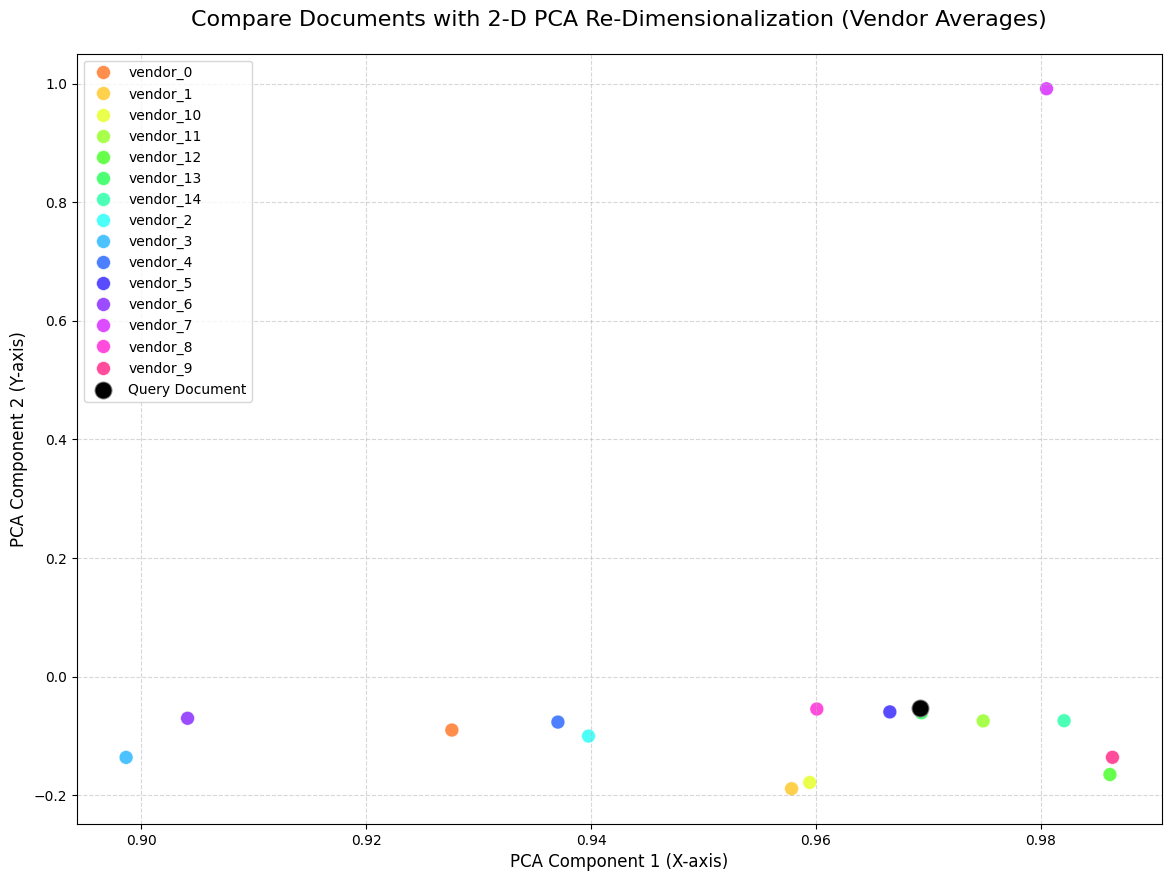

In [43]:
pca_predictions_vendors['pca_x'] = pca_predictions_vendors['pca_embedding'].apply(lambda emb: emb[0])
pca_predictions_vendors['pca_y'] = pca_predictions_vendors['pca_embedding'].apply(lambda emb: emb[1])
pca_predictions_query['pca_x'] = pca_predictions_query['pca_embedding'].apply(lambda emb: emb[0])
pca_predictions_query['pca_y'] = pca_predictions_query['pca_embedding'].apply(lambda emb: emb[1])

num_vendors = pca_predictions_vendors['vendor'].nunique()
palette = sns.color_palette("hsv", num_vendors)

plt.figure(figsize=(14, 10))
plt.title("Compare Documents with 2-D PCA Re-Dimensionalization (Vendor Averages)", fontsize=16, pad=20)
plt.xlabel("PCA Component 1 (X-axis)", fontsize=12)
plt.ylabel("PCA Component 2 (Y-axis)", fontsize=12)
plt.legend(title='Vendor', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)

ax = sns.scatterplot(
    data=pca_predictions_vendors,
    x='pca_x',
    y='pca_y',
    hue='vendor',       # Color points by vendor
    palette=palette,    # Color palette to use
    s=100,              # Size of the points
    alpha=0.7,          # Transparency of the points
    edgecolor='w',      # Edge color for points, can make them pop
    linewidth=0.5
)

sns.scatterplot(
    data=pca_predictions_query,
    x='pca_x',
    y='pca_y',
    color='black',
    s=150,              # Size of the points
    alpha=1.0,          # Transparency of the points
    edgecolor='gray',      # Edge color for points, can make them pop
    linewidth=0.7,
    label='Query Document',
    zorder=5
)

plt.show()

## Add Anomaly Detection To The Documents With Unknown Authenticity

Back in step 2 ([2-document-extration](./2-document-extraction.ipynb)) we setup tables with the extracted result for both types of documents: known authenticity and unknown authenticity.  In step 3 ([3-document-embedding](./3-document-embedding.ipynb)) we added embedded representations of the documents to each row.  In this step we are going to add the similarity measure (distance) and the evaluation of this (z_score) and a decision about the anomaly status (True if z_score > 3).

In [44]:
%%bigquery
ALTER TABLE `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
ADD COLUMN anomaly_distance FLOAT64,
ADD COLUMN anomaly_z_score FLOAT64,
ADD COLUMN anomaly_decision BOOL;

Query is running:   0%|          |

""


In [45]:
%%bigquery
UPDATE `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
AS target_table
SET
    target_table.anomaly_distance = anomaly.distance,
    target_table.anomaly_z_score = anomaly.z_score,
    target_table.anomaly_decision = (anomaly.z_score >= 2.0)
FROM (
    SELECT
        query.uri as uri, 
        base.vendor as vendor,
        distance,
        ABS((distance - base.average_distance_center) / base.stddev_distance_center) AS Z_score
    FROM VECTOR_SEARCH(
        # The base table and column to search for neighbors in:
        (
            SELECT vendor, average_embedding, average_distance_center, stddev_distance_center
            FROM `statmike-mlops-349915.solution_prototype_document_processing.known_authenticity_vendor_info`
        ),
        'average_embedding',
        # The query table and column to search with - pick an anomalous doucment
        (
            SELECT uri, embedding, vendor
            FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
        ),
        'embedding',
        # options
        top_k => -1,
        distance_type => 'DOT_PRODUCT'
    )
    WHERE query.vendor = base.vendor
) AS anomaly
WHERE target_table.uri = anomaly.uri

Query is running:   0%|          |

""


### Review Anomaly Detection

In [46]:
%%bigquery
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,ml_process_document_result,ml_process_document_status,vendor_name,vendor_address,company_name,company_address,invoice_id,invoice_total,line_item,uri,updated,vendor,embedding,anomaly_distance,anomaly_z_score,anomaly_decision
0,"{""mimeType"":""application/pdf""}",,None,None,None,None,None,None,[],gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:55:09.934000+00:00,vendor_8,"[0.0160381682, 0.0116377119, 0.00194062886, 0....",-0.460991,55.873966,True
1,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,None,None,Cyberdyne Systems,"789 Pine Lane\nHill Valley, WA 98052",INV-2024-1022,$50032.00,"[{'item_sku': 'CS- WEB- 001', 'item_descriptio...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:54:13.291000+00:00,vendor_5,"[0.00087831, 0.0551444367, 0.0510212779, -0.00...",-0.921502,10.715302,True
2,"{""mimeType"":""application/pdf""}",,None,None,None,None,None,None,[],gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:54:11.423000+00:00,vendor_5,"[0.0131794149, 0.0133737465, 0.00720742205, -0...",-0.483990,119.264456,True
3,"{""entities"":[{""confidence"":1,""id"":""2"",""mention...",,Apex Digital Solutions,None,TrendStyle Retail,"345 Birch St\nLos Angeles, CA 90012",INV-2024-0322,$12528.00,"[{'item_sku': 'SWDEV- 001', 'item_description'...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:10.652000+00:00,vendor_10,"[-0.00644508842, 0.0360948518, 0.0467085019, -...",-0.919795,5.433817,True
4,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,Apex Digital Solutions,None,Apex Fintech,"456 Market St\nNew York, NY 10001",INV-2024-0315,$21040.00,"[{'item_sku': 'CSD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:10.234000+00:00,vendor_10,"[-0.0120130433, 0.0339877978, 0.0499950275, -0...",-0.910812,6.628651,True


In [47]:
%%bigquery
SELECT anomaly_decision, count(*) AS n_documents
FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
GROUP BY anomaly_decision

Query is running:   0%|          |

Downloading:   0%|          |

,anomaly_decision,n_documents
0,True,278
1,False,21


In [50]:
%%bigquery missed_anomalies
SELECT *
FROM `statmike-mlops-349915.solution_prototype_document_processing.unknown_authenticity`
WHERE anomaly_decision = False
ORDER BY anomaly_z_score DESC

Query is running:   0%|          |

Downloading:   0%|          |

In [51]:
missed_anomalies

,ml_process_document_result,ml_process_document_status,vendor_name,vendor_address,company_name,company_address,invoice_id,invoice_total,line_item,uri,updated,vendor,embedding,anomaly_distance,anomaly_z_score,anomaly_decision
0,"{""entities"":[{""confidence"":1,""id"":""1"",""propert...",,Horizon Software Inc.,"555 Pine Avenue\nDenver, CO 80202",ShopStream Commerce,"123 Main Avenue\nNew York, NY 10001",INV-2024-0315,"$21,840.00","[{'item_sku': 'CSD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:51:45.882000+00:00,vendor_1,"[-0.0206727628, 0.0371131301, 0.0426079966, -0...",-0.914230,1.993484,False
1,"{""entities"":[{""confidence"":1,""id"":""1"",""mention...",,Horizon Software Inc.,"555 Pine Avenue\nDenver, CO 80202",QuickCart Commerce,"456 Market St\nNew York, NY 10001",INV-2024-7890,"$21,040.00","[{'item_sku': 'CSD-001', 'item_description': '...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:51:50.811000+00:00,vendor_1,"[-0.0292173047, 0.0416014157, 0.0548896566, -0...",-0.915117,1.917633,False
2,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,LUNARTECH SOLUTIONS,None,EduTech Solutions,"222 Maple Drive\nBoston, MA 02115",INV-2024-7890,$21840.00,"[{'item_sku': 'SWDEV-001', 'item_description':...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:29.799000+00:00,vendor_11,"[0.000559283129, 0.0497701168, 0.042282816, -0...",-0.915087,1.870988,False
3,"{""entities"":[{""confidence"":1,""id"":""1"",""mention...",,LUNARTECH SOLUTIONS,None,Velocity Logistics,"222 Cedar Road\nAtlanta, GA 30303",INV-2024-7890,$20800.00,"[{'item_sku': 'SWDEV-001', 'item_description':...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:26.315000+00:00,vendor_11,"[0.00174478535, 0.0292013139, 0.0434455834, -0...",-0.917286,1.705662,False
4,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,Horizon Software Inc.,"555 Pine Avenue, Denver, CO 80202",CloudSpring Solutions,"444 Pine Street\nDenver, CO 80202",INV-2024-0722,"$21,840.00","[{'item_sku': 'CSD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:51:53.862000+00:00,vendor_1,"[-0.0286559854, 0.0430914275, 0.0538886301, -0...",-0.918570,1.622565,False
5,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,LUNARTECH SOLUTIONS,None,CloudGenius Apps,"123 Tech Circle\nAustin, TX 78701",INV-2024-7890,$21840.00,"[{'item_sku': 'SWDEV- 001', 'item_description'...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:25.565000+00:00,vendor_11,"[0.00209408719, 0.0388103463, 0.0473440476, -0...",-0.918810,1.591046,False
6,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,LUNARTECH SOLUTIONS,None,Zenith Financial AI,"456 Pine Avenue\nNew York, NY 10001",INV-2024-7789,$21840.00,"[{'item_sku': 'SWDEV- 001', 'item_description'...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:24.020000+00:00,vendor_11,"[-0.00170221087, 0.0388144739, 0.0532589369, -...",-0.919146,1.565802,False
7,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,LUNARTECH SOLUTIONS,None,Apex Digital Health,"246 Forest Ave\nPortland, OR 97201",INV-2024-7890,$21840.00,"[{'item_sku': 'SWD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:52:27.848000+00:00,vendor_11,"[0.0018714288, 0.0405265354, 0.0522562563, -0....",-0.919983,1.502891,False
8,"{""entities"":[{""confidence"":1,""id"":""2"",""mention...",,Cloudstream SaaS Solutions,"444 Cedar Street Seattle, WA 98101",Cloudstream SaaS Solutions,"444 Cedar Street Seattle, WA 98101",INV-2024-0715,"$21,840.00","[{'item_sku': 'CSD- 001', 'item_description': ...",gs://statmike-mlops-349915/applied-ml-solution...,2025-04-23 20:51:53.481000+00:00,vendor_1,"[-0.0292146951, 0.0430270024, 0.0424615778, -0...",-0.920170,1.485859,False
9,"{""entities"":[{""confidence"":1,""id"":""0"",""mention...",,Innovative Designs Co.,"666 Elm Road, 

### Visually Compare Least Anomalous Document

Compare the least anomalous current document to a known authentic document.

In [55]:
current_uri = missed_anomalies['uri'].tolist()[-1]
current_z_score = missed_anomalies['anomaly_z_score'].tolist()[-1]
current_z_score, current_uri

(0.7282128112427101,
 'gs://statmike-mlops-349915/applied-ml-solution-prototypes/document-processing/vendor_2/fake_invoices/vendor_2_invoice_3.pdf')

In [59]:
def compare_documents(z_score, query_uri):
    query_uri = query_uri.replace('.pdf', '.png')
    compare_uri = query_uri.replace('fake_', '')

    bucket = gcs.bucket(GCS_BUCKET)
    query_blob = bucket.blob(query_uri.split(f"gs://{bucket.name}/")[1])
    compare_blob = bucket.blob(compare_uri.split(f"gs://{bucket.name}/")[1])

    query_image_bytes = ipywidgets.Image(value= query_blob.download_as_bytes(), format = 'png', width = 400)
    compare_image_bytes = ipywidgets.Image(value= compare_blob.download_as_bytes(), format = 'png', width = 400)
    
    return display(
        ipywidgets.HBox(
            [
                ipywidgets.VBox([ipywidgets.HTML(value = f"<div style='text-align: center; margin-bottom: 5px;'><b>Query Document: Z-score = {z_score:.2f}</b></div>"), query_image_bytes], layout = {'align_items': 'center'}),
                ipywidgets.VBox([ipywidgets.HTML(value = f"<div style='text-align: center; margin-bottom: 5px;'><b>Compare Example: Known Authentic</b></div>"), compare_image_bytes], layout = {'align_items': 'center'}),
            ],
            layout = {'justify_content': 'space-around'}
        )
    )

compare_documents(current_z_score, current_uri)